In [1]:
import pandas as pd

In [2]:
PATH = './datasets/openfoodfacts_part1.csv'

In [3]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import mpld3
# mpld3.enable_notebook()

In [105]:
dataset = pd.read_csv(PATH, sep = '\t') 

C:\Users\celie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (9,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Read all CSVs

In [4]:
li = []
for _ in range(1,16):
    path_dataset = f'./datasets/openfoodfacts_part{_}.csv'
    dataset = pd.read_csv(PATH, sep = '\t')
    li.append(dataset)
    
dataset = pd.concat(li, axis=0, ignore_index=True)

C:\Users\celie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (9,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Get upper category

In [5]:
dataset["big_category"] = dataset["categories_tags"].apply(lambda x : x.split(",")[0])

In [6]:
len(dataset["big_category"].unique())

130

## Keep only interesting columns

In [7]:
dataset = dataset[[
"product_name",
"categories_tags",
"nutriscore_score",
"nutriscore_grade",
"energy-kj_100g",
"energy_100g",
"energy-kcal_100g",
"energy-from-fat_100g",
"fat_100g",
"saturated-fat_100g",
"-butyric-acid_100g",
"-caproic-acid_100g",
"-caprylic-acid_100g",
"-capric-acid_100g",
"-lauric-acid_100g",
"-myristic-acid_100g",
"-palmitic-acid_100g",
"-stearic-acid_100g",
"-arachidic-acid_100g",
"-behenic-acid_100g",
"-lignoceric-acid_100g",
"-cerotic-acid_100g",
"-montanic-acid_100g",
"-melissic-acid_100g",
"monounsaturated-fat_100g",
"polyunsaturated-fat_100g",
"omega-3-fat_100g",
"-alpha-linolenic-acid_100g",
"-eicosapentaenoic-acid_100g",
"-docosahexaenoic-acid_100g",
"omega-6-fat_100g",
"-linoleic-acid_100g",
"-arachidonic-acid_100g",
"-gamma-linolenic-acid_100g",
"-dihomo-gamma-linolenic-acid_100g",
"omega-9-fat_100g",
"-oleic-acid_100g",
"-elaidic-acid_100g",
"-gondoic-acid_100g",
"-mead-acid_100g",
"-erucic-acid_100g",
"-nervonic-acid_100g",
"trans-fat_100g",
"cholesterol_100g",
"carbohydrates_100g",
"sugars_100g",
"-sucrose_100g",
"-glucose_100g",
"-fructose_100g",
"-lactose_100g",
"-maltose_100g",
"-maltodextrins_100g",
"starch_100g",
"polyols_100g",
"fiber_100g",
"-soluble-fiber_100g",
"-insoluble-fiber_100g",
"proteins_100g",
"casein_100g",
"serum-proteins_100g",
"nucleotides_100g",
"salt_100g",
"sodium_100g",
"alcohol_100g",
"vitamin-a_100g",
"beta-carotene_100g",
"vitamin-d_100g",
"vitamin-e_100g",
"vitamin-k_100g",
"vitamin-c_100g",
"vitamin-b1_100g",
"vitamin-b2_100g",
"vitamin-pp_100g",
"vitamin-b6_100g",
"vitamin-b9_100g",
"folates_100g",
"vitamin-b12_100g",
"biotin_100g",
"pantothenic-acid_100g",
"silica_100g",
"bicarbonate_100g",
"potassium_100g",
"chloride_100g",
"calcium_100g",
"phosphorus_100g",
"iron_100g",
"magnesium_100g",
"zinc_100g",
"copper_100g",
"manganese_100g",
"fluoride_100g",
"selenium_100g",
"chromium_100g",
"molybdenum_100g",
"iodine_100g",
"caffeine_100g",
"taurine_100g",
"ph_100g",
"fruits-vegetables-nuts_100g",
"fruits-vegetables-nuts-dried_100g",
"fruits-vegetables-nuts-estimate_100g",
"collagen-meat-protein-ratio_100g",
"cocoa_100g",
"chlorophyl_100g",
"carbon-footprint_100g",
"carbon-footprint-from-meat-or-fish_100g",
"nutrition-score-fr_100g",
"nutrition-score-uk_100g",
"glycemic-index_100g",
"water-hardness_100g",
"choline_100g",
"phylloquinone_100g",
"beta-glucan_100g",
"inositol_100g",
"carnitine_100g",
"ingredients_en",
    "big_category"
]]

## Retirer les lignes des catégories qui ont moins de 20% de valeurs non renseignés

In [8]:
i = 0
for _ in dataset.columns:
    if dataset[_].isna().sum() < len(dataset)*20/100:
        print(f'{_} : {dataset[_].isna().sum()}')
        i+=1
        dataset = dataset.dropna(subset=[_])
print(i)

product_name : 0
categories_tags : 0
nutriscore_score : 97350
nutriscore_grade : 0
energy_100g : 15
energy-kcal_100g : 1890
fat_100g : 0
saturated-fat_100g : 105
trans-fat_100g : 26865
cholesterol_100g : 2325
carbohydrates_100g : 0
sugars_100g : 0
fiber_100g : 3390
proteins_100g : 0
salt_100g : 0
sodium_100g : 0
vitamin-c_100g : 75855
calcium_100g : 915
iron_100g : 300
nutrition-score-fr_100g : 0
ingredients_en : 0
big_category : 0
22


In [9]:
dataset.shape

(303720, 117)

## Retirer les connards

In [10]:
dataset =  dataset[dataset["energy-kcal_100g"] < 15000] 

## Define X

In [20]:
df = dataset[[
    "fat_100g",
#     "saturated-fat_100g",
#     "sugars_100g",
#     "fiber_100g"
    "nutriscore_score"
]]

In [21]:
df = dataset[[
    "energy-kcal_100g",
    "fat_100g",
    "saturated-fat_100g",
    "sugars_100g",
    "fiber_100g",
    "nutriscore_score"
]]

In [28]:
df = dataset[[
    "energy-kcal_100g",
    "fat_100g",
    "saturated-fat_100g",
    "trans-fat_100g",
    "cholesterol_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g",
    "vitamin-c_100g",
    "calcium_100g",
    "iron_100g",
    "nutriscore_score"
]]

# K-means 

## Predict big category

In [29]:
model=KMeans(n_clusters=len(dataset["big_category"].unique()))
model.fit(df)

KMeans(n_clusters=41)

In [30]:
print(model.labels_)

[27 25 25 ... 18 13 13]


In [31]:
import random
cmap = np.array([ np.random.choice(range(256), size=3)/256 for j in range(len(dataset["big_category"].unique()))])

In [32]:
cat = dataset["big_category"].unique().tolist()
dataset["big_category_number"] = dataset["big_category"].apply(lambda x : cat.index(x) )

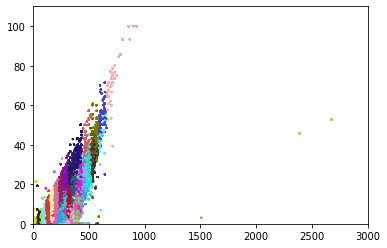

In [33]:
plt.ylim(top=110)
plt.xlim(right=3000)
plt.scatter(df["energy-kcal_100g"], df["fat_100g"], s=1, c=cmap[model.labels_])

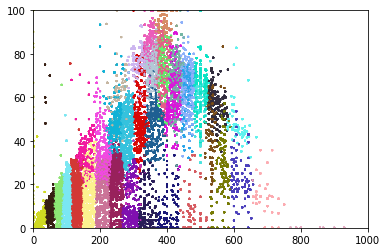

In [34]:
plt.ylim(top=100)
plt.xlim(right=1000)
plt.scatter(df["energy-kcal_100g"], df["carbohydrates_100g"], s=1, c=cmap[model.labels_])

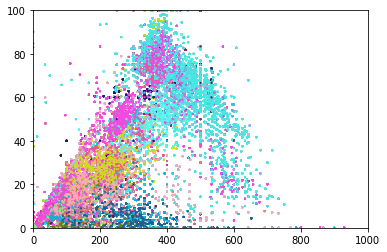

In [35]:
plt.ylim(top=100)
plt.xlim(right=1000)
plt.scatter(df["energy-kcal_100g"], df["carbohydrates_100g"], s=1, c=cmap[dataset["big_category_number"]])

## Nutrigrade

    "fat_100g",
    "saturated-fat_100g",
    "sugars_100g",
    "fiber_100g",
    "nutriscore_score"

In [36]:
cat = dataset["nutriscore_grade"].unique().tolist()
dataset["nutriscore_grade_number"] = dataset["nutriscore_grade"].apply(lambda x : cat.index(x) )

In [37]:
model=KMeans(n_clusters=len(dataset["nutriscore_grade"].unique()))
model.fit(df)

KMeans(n_clusters=5)

In [38]:
cmap = np.array([ np.random.choice(range(256), size=3)/256 for j in range(len(dataset["nutriscore_grade"].unique()))])

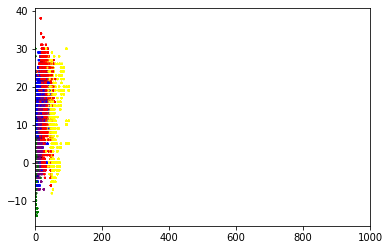

In [39]:
cmap = np.array(["green", "yellow", "blue", "purple", "red"])
# plt.ylim(top=100)
plt.xlim(right=1000)
plt.scatter(dataset["fat_100g"], dataset["nutriscore_score"], s=1, c=cmap[model.labels_])

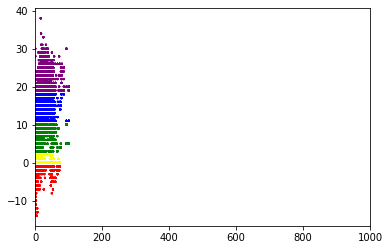

In [40]:
# plt.ylim(top=100)
plt.xlim(right=1000)
plt.scatter(dataset["fat_100g"], dataset["nutriscore_score"], s=1, c=cmap[dataset["nutriscore_grade_number"]])

## Correlation

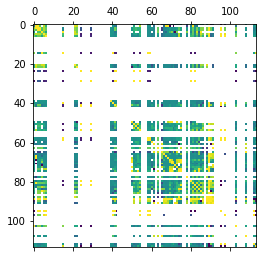

In [41]:
plt.matshow(dataset.corr())
plt.show()

In [42]:
rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,energy-kcal_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-c_100g,calcium_100g,iron_100g,nutriscore_score
energy-kcal_100g,1.000000,0.764189,0.544473,0.057371,0.001509,0.566844,0.348160,0.291192,0.294121,-0.019875,-0.019874,-0.077747,0.140278,0.084020,0.620743
fat_100g,0.764189,1.000000,0.709659,0.063476,0.011330,-0.041517,0.000138,0.155377,0.304925,-0.013528,-0.013529,-0.123421,0.214218,0.000752,0.513451
saturated-fat_100g,0.544473,0.709659,1.000000,0.030459,0.020400,-0.031988,0.154926,-0.034110,0.197579,-0.033606,-0.033606,-0.130417,0.342039,-0.029150,0.600634
trans-fat_100g,0.057371,0.063476,0.030459,1.000000,-0.001398,0.019159,0.020709,-0.004902,-0.025556,0.012622,0.012622,-0.013621,-0.019881,-0.002764,0.059152
cholesterol_100g,0.001509,0.011330,0.020400,-0.001398,1.000000,-0.015907,-0.004298,-0.010028,0.019672,0.000359,0.000359,-0.006600,0.015069,-0.002481,0.009151
carbohydrates_100g,0.566844,-0.041517,-0.031988,0.019159,-0.015907,1.000000,0.638896,0.275556,-0.156766,-0.045368,-0.045367,0.051711,-0.138783,0.120406,0.330134
sugars_100g,0.348160,0.000138,0.154926,0.020709,-0.004298,0.638896,1.000000,-0.037296,-0.283566,-0.100338,-0.100338,0.052152,-0.100311,0.000094,0.499443
fiber_100g,0.291192,0.155377,-0.034110,-0.004902,-0.010028,0.275556,-0.037296,1.000000,0.194650,-0.027870,-0.027870,0.039636,-0.000412,0.134964,-0.179251
proteins_100g,0.294121,0.304925,0.197579,-0.025556,0.019672,-0.156766,-0.283566,0.194650,1.000000,0.070420,0.070421,-0.120059,0.410854,0.054752,0.092160
salt_100g,-0.019875,-0.013528,-0.033606,0.012622,0.000359,-0.045368,-0.100338,-0.027870,0.070420,1.000000,1.000000,-0.000978,0.014462,0.008239,0.130815


# Decision tree

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [44]:
df = dataset[[
    "energy-kcal_100g",
    "fat_100g",
    "saturated-fat_100g",
    "trans-fat_100g",
    "cholesterol_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g",
    "vitamin-c_100g",
    "calcium_100g",
    "iron_100g"
]]
Y = dataset[["nutriscore_grade"]]

In [47]:
dtc = DecisionTreeClassifier()
dtc.fit(df, Y)

TypeError: fit() missing 1 required positional argument: 'y'

[Text(178.08495520149822, 213.25846153846155, 'X[0] <= 163.5\ngini = 0.774\nsamples = 303705\nvalue = [60690, 34575, 55785, 100830, 51825]'),
 Text(87.24294324937487, 204.89538461538461, 'X[9] <= 0.849\ngini = 0.696\nsamples = 98925\nvalue = [43920, 22455, 21960, 6570, 4020]'),
 Text(61.20313614423206, 196.53230769230768, 'X[2] <= 1.005\ngini = 0.601\nsamples = 70245\nvalue = [40305, 15465, 9405, 1170, 3900]'),
 Text(40.00486680413842, 188.16923076923078, 'X[7] <= 0.55\ngini = 0.522\nsamples = 57990\nvalue = [38385, 9480, 5160, 1140, 3825]'),
 Text(19.622279338960865, 179.80615384615385, 'X[8] <= 3.3\ngini = 0.748\nsamples = 18525\nvalue = [6495, 4380, 3540, 615, 3495]'),
 Text(12.702382400818959, 171.44307692307692, 'X[6] <= 7.785\ngini = 0.75\nsamples = 11595\nvalue = [1230, 3165, 3225, 615, 3360]'),
 Text(4.933114049808687, 163.07999999999998, 'X[6] <= 1.339\ngini = 0.559\nsamples = 4500\nvalue = [285, 2865, 510, 555, 285]'),
 Text(2.9890850506813456, 154.71692307692308, 'X[9] <= 0.

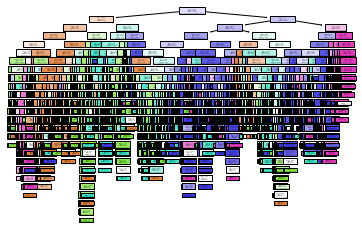

In [46]:
plot_tree(dtc, filled=True)

# DBSCAN

In [53]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [66]:
df = dataset[[
    "energy-kcal_100g",
    "fat_100g",
    "saturated-fat_100g",
    "trans-fat_100g",
    "cholesterol_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g",
    "vitamin-c_100g",
    "calcium_100g",
    "iron_100g"
]]
Y = dataset[["nutriscore_grade"]]

In [73]:
db = DBSCAN(eps=10, min_samples=5).fit(df)

In [74]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [75]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(dataset["nutriscore_grade"], labels))
print("Completeness: %0.3f" % metrics.completeness_score(dataset["nutriscore_grade"], labels))
print("V-measure: %0.3f" % metrics.v_measure_score(dataset["nutriscore_grade"], labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(dataset["nutriscore_grade"], labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(dataset["nutriscore_grade"], labels)
)
# print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df, labels))

Estimated number of clusters: 752
Estimated number of noise points: 0
Homogeneity: 0.090
Completeness: 0.143
V-measure: 0.111
Adjusted Rand Index: -0.003
Adjusted Mutual Information: 0.107


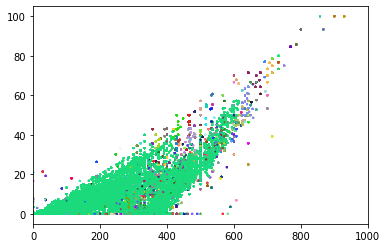

In [77]:
# cmap = np.array(["green", "yellow", "blue", "purple", "red"])
cmap = np.array([ np.random.choice(range(256), size=3)/256 for j in range(752)])
# plt.ylim(top=100)
plt.xlim(right=1000)
plt.scatter(df["energy-kcal_100g"], df["fat_100g"], s=1, c=cmap[labels])

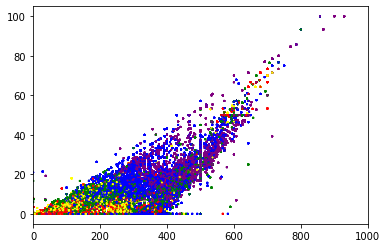

In [79]:
cmap = np.array(["green", "yellow", "blue", "purple", "red"])
# plt.ylim(top=110)
plt.xlim(right=1000)
plt.scatter(df["energy-kcal_100g"], df["fat_100g"], s=1, c=cmap[dataset["nutriscore_grade_number"]])

In [64]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = df[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key